In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import inspect
import time
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
import tensorflow as tf
import os

77 612 28 51

In [58]:
df=pd.read_csv("/content/sample_data/MarketPricePrediction(2).csv")

In [59]:
df.head(10)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
5,ABOHAR(PB),January,2013,675,1327,1900,1605,PB,ABOHAR,January-2013
6,ABOHAR(PB),January,2014,440,1025,1481,1256,PB,ABOHAR,January-2014
7,ABOHAR(PB),January,2015,1305,1309,1858,1613,PB,ABOHAR,January-2015
8,ABOHAR(PB),February,2005,1400,286,365,324,PB,ABOHAR,February-2005
9,ABOHAR(PB),February,2006,1800,343,411,380,PB,ABOHAR,February-2006


In [60]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df['quantity'] = imputer.fit_transform(df[['quantity']])
df['priceMin'] = imputer.fit_transform(df[['priceMin']])
df['priceMax'] = imputer.fit_transform(df[['priceMax']])
df['priceMod'] = imputer.fit_transform(df[['priceMod']])


In [61]:
# Encode categorical variables
le_market = LabelEncoder()
df['market'] = le_market.fit_transform(df['market'])
le_state = LabelEncoder()
df['state'] = le_state.fit_transform(df['state'])
le_city = LabelEncoder()
df['city'] = le_city.fit_transform(df['city'])

In [62]:
# Extract date components
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
print(df.head())

   market  month  year  quantity  priceMin  priceMax  priceMod  state  city  \
0       0      1  2005    2350.0     404.0     493.0     446.0     16     0   
1       0      1  2006     900.0     487.0     638.0     563.0     16     0   
2       0      1  2010     790.0    1283.0    1592.0    1460.0     16     0   
3       0      1  2011     245.0    3067.0    3750.0    3433.0     16     0   
4       0      1  2012    1035.0     523.0     686.0     605.0     16     0   

        date  
0 2005-01-01  
1 2006-01-01  
2 2010-01-01  
3 2011-01-01  
4 2012-01-01  


<ipython-input-62-00129ff48e41>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


#EDA

In [63]:
def smooth_data(series, window=12):
    return series.rolling(window=window).mean()

<ipython-input-71-94f82c9140ee>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust the padding of the plot


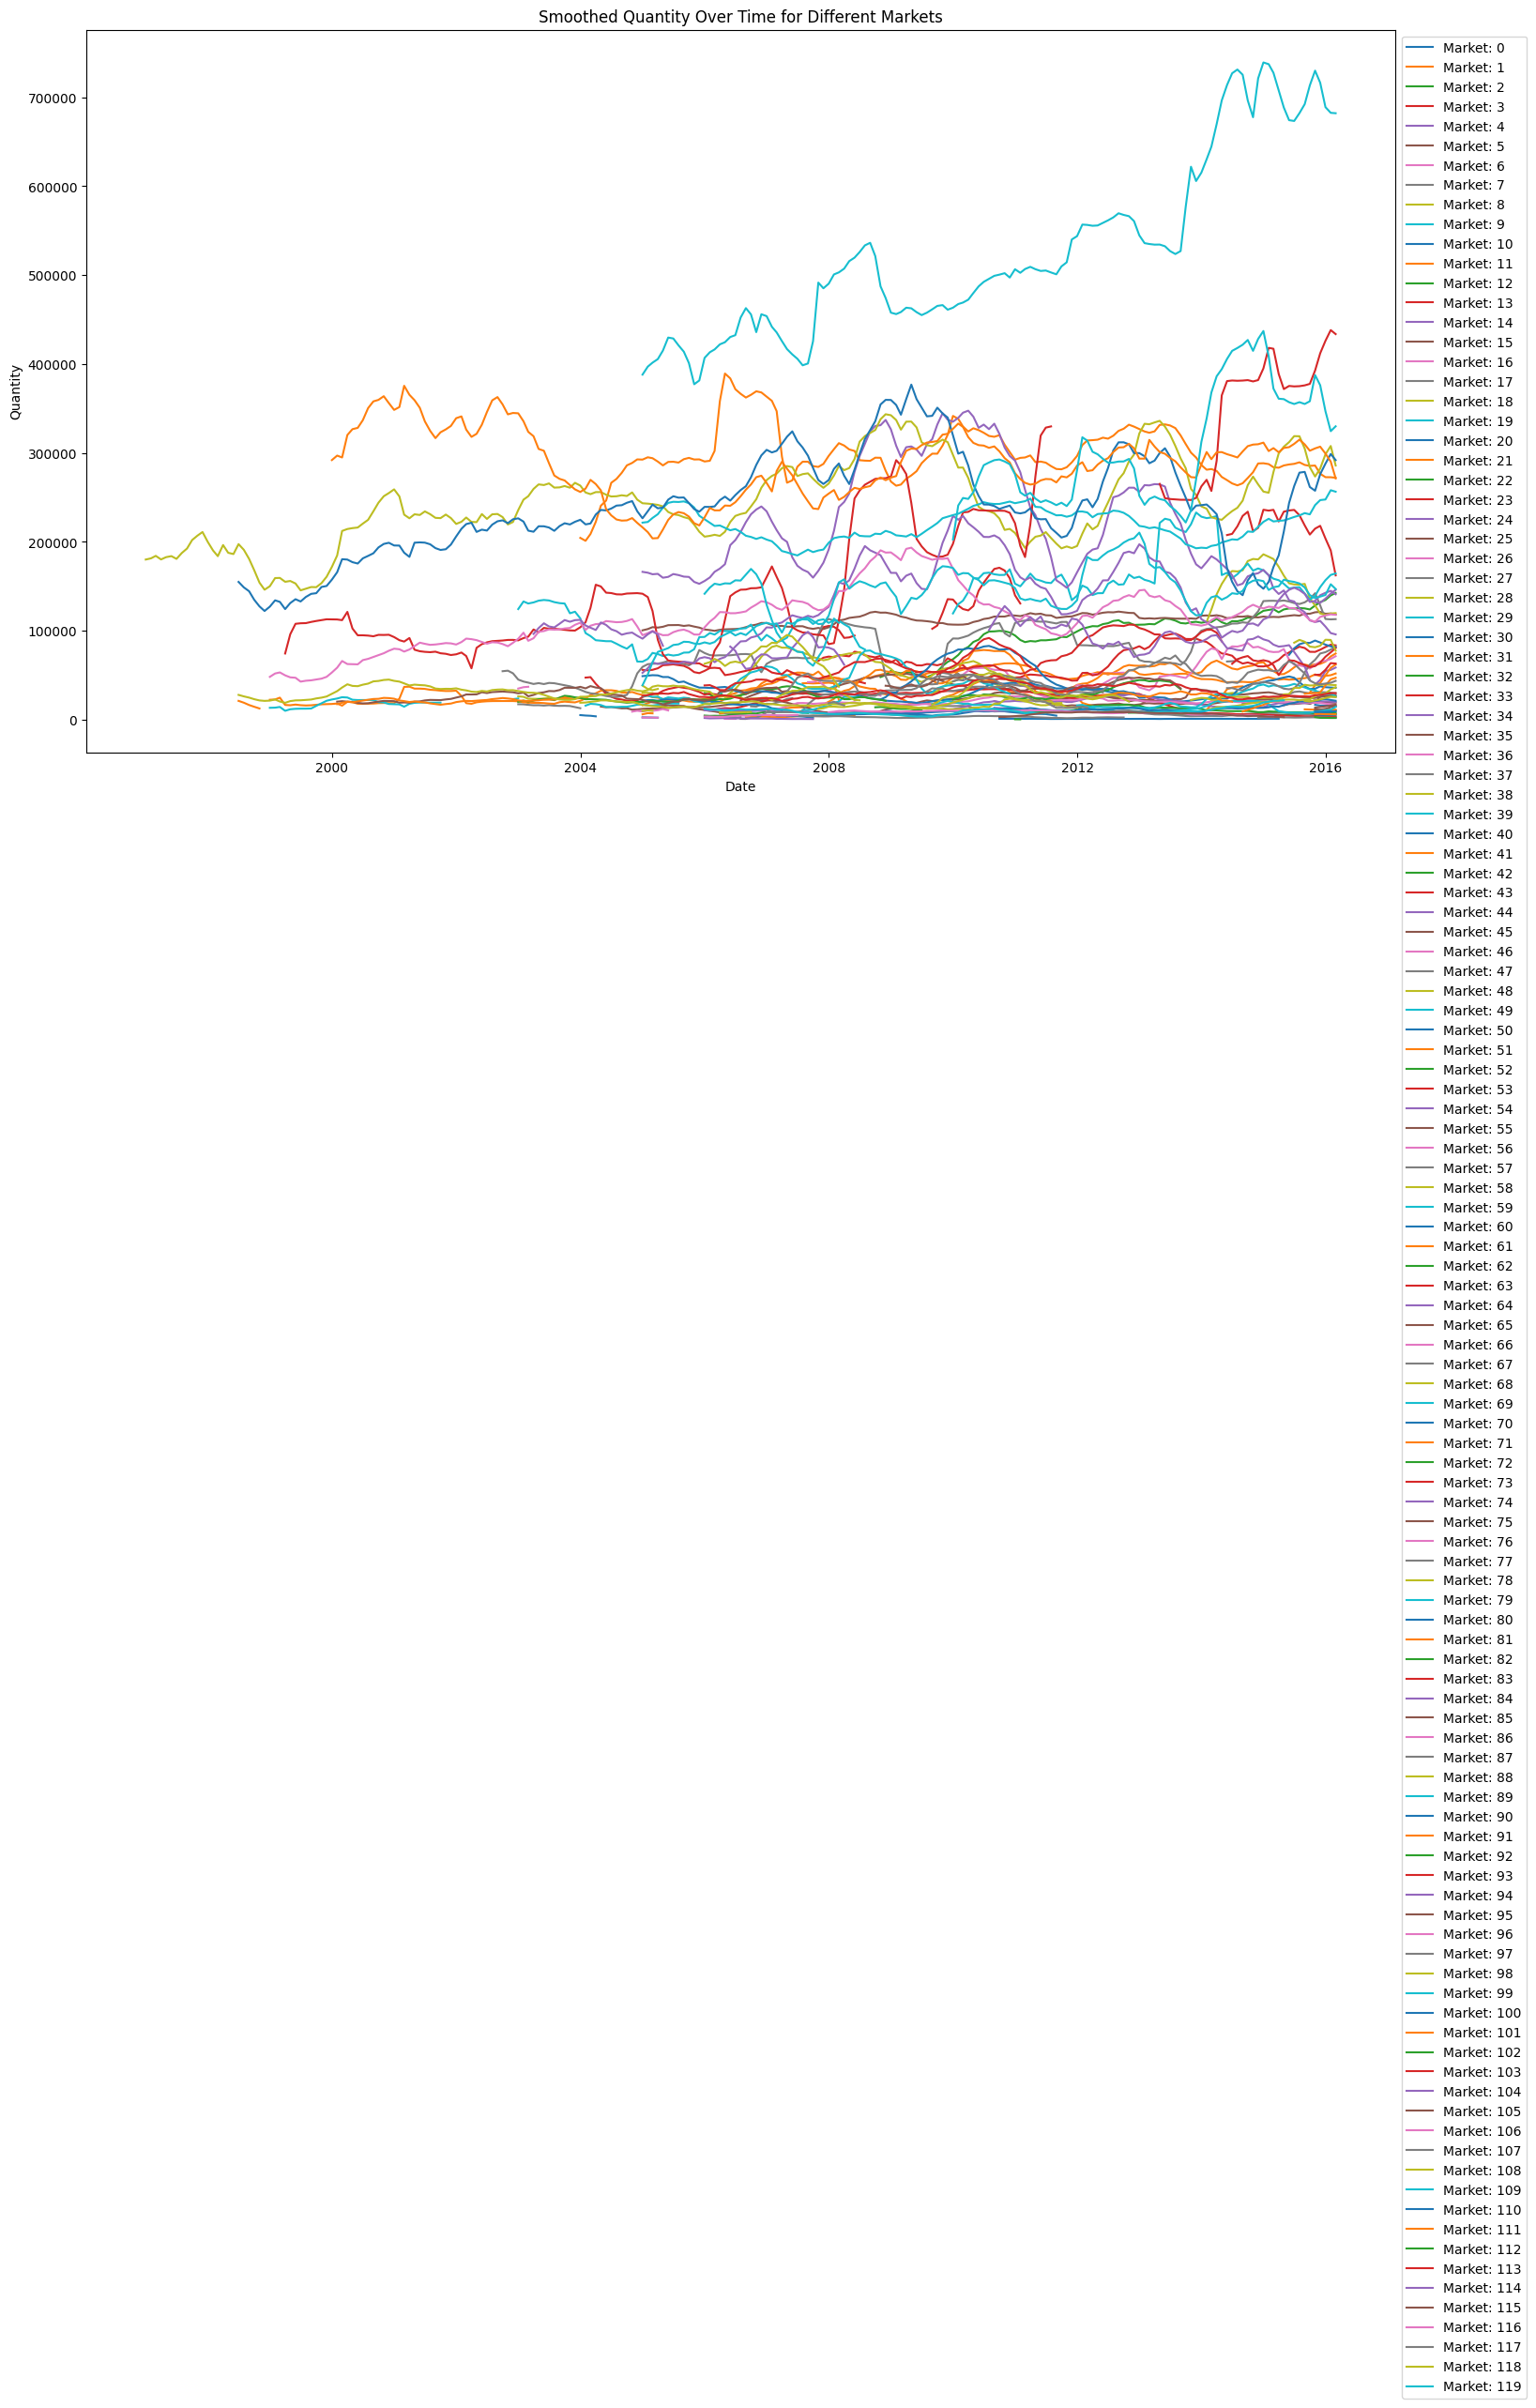

In [71]:
# Plot data for individual markets with smoothing
unique_markets = df['market'].unique()

plt.figure(figsize=(18, 10))  # Make the graph bigger

for market in unique_markets:
    market_df = df[df['market'] == market].set_index('date').resample('M').mean()  # Resample to monthly frequency
    smoothed_quantity = smooth_data(market_df['quantity'])
    plt.plot(smoothed_quantity, label=f'Market: {market}')

plt.title('Smoothed Quantity Over Time for Different Markets')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Ensure the labels are within the graph frame
plt.tight_layout()  # Adjust the padding of the plot
plt.show()

#Time series

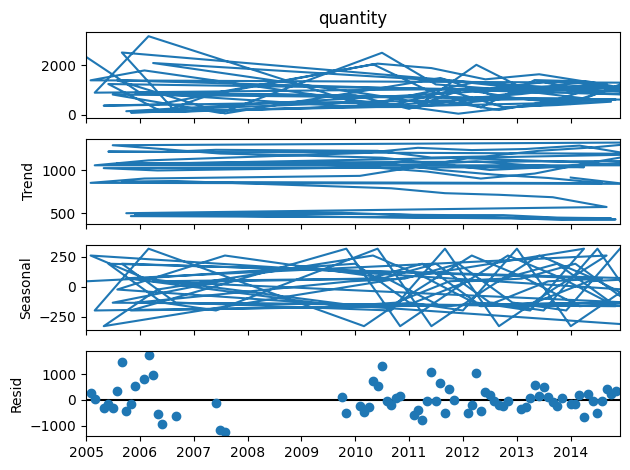

In [65]:
selected_market = unique_markets[0]
selected_market_df = df[df['market'] == selected_market].set_index('date')
result = seasonal_decompose(selected_market_df['quantity'], model='additive', period=12)
result.plot()
plt.show()

In [52]:
# Correlation matrix
#plt.figure(figsize=(10, 6))
#sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix')
#plt.show()


In [72]:
quan =df[['quantity']].copy(deep=True)
quan['firstDiff'] = quan['quantity'].diff()
quan['12Diff'] = quan['quantity'].diff(12)
quan.dropna().head()

,quantity,firstDiff,12Diff
12,675.0,375.0,-1675.0
13,845.0,170.0,-55.0
14,1115.0,270.0,325.0
15,1115.0,0.0,870.0
16,900.0,-215.0,-135.0


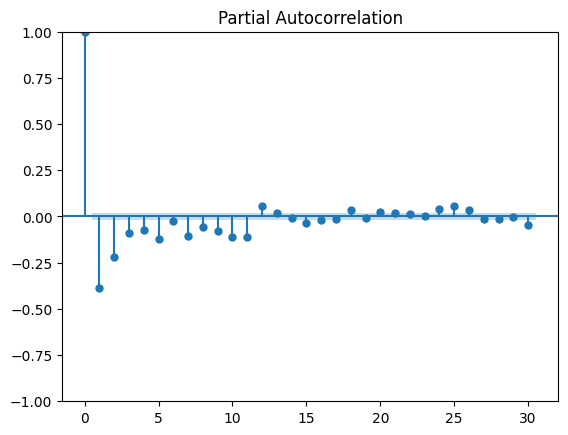

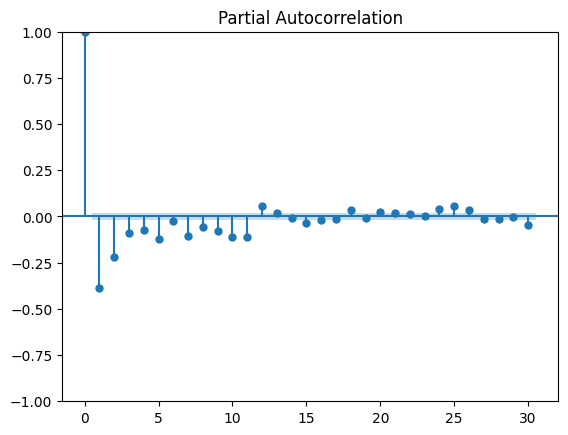

In [73]:


from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


plot_pacf(quan['firstDiff'].dropna(),lags=30)



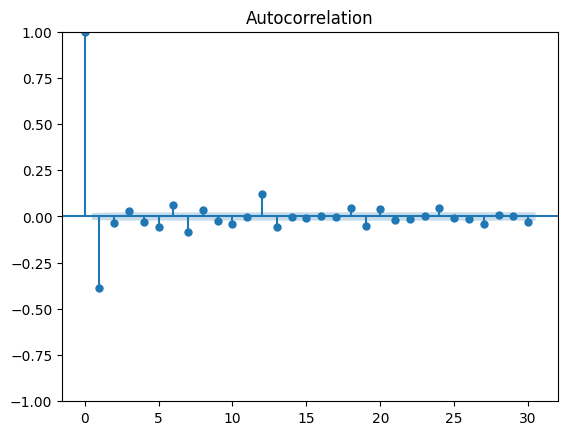

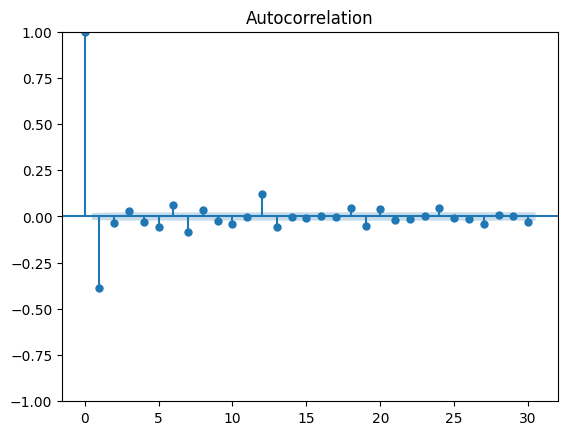

In [74]:
plot_acf(quan['firstDiff'].dropna(),lags=30)


# Correlation matrix

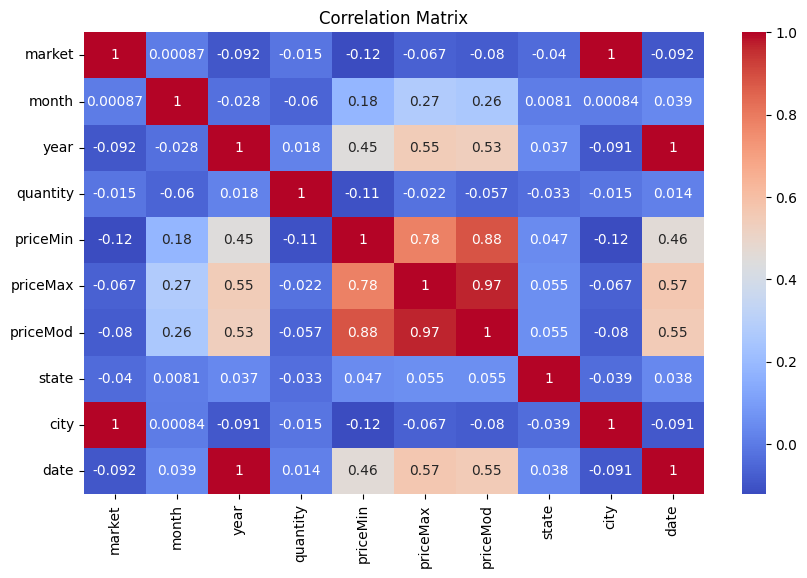

In [66]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Feature Engineering

In [14]:
# Create lagged features
df['quantity_lag1'] = df['quantity'].shift(1)
df['quantity_lag2'] = df['quantity'].shift(2)

In [15]:
# Create rolling statistics
df['quantity_roll_mean'] = df['quantity'].rolling(window=3).mean()
df['quantity_roll_std'] = df['quantity'].rolling(window=3).std()


In [16]:
# Create seasonal indicators
df = pd.get_dummies(df, columns=['month'], drop_first=True)


In [17]:
# Drop rows with NaN values created by shifting
df = df.dropna()
print(df.head())

   market  year  quantity  priceMin  priceMax  priceMod  state  city  \
2       0  2010     790.0    1283.0    1592.0    1460.0     16     0   
3       0  2011     245.0    3067.0    3750.0    3433.0     16     0   
4       0  2012    1035.0     523.0     686.0     605.0     16     0   
5       0  2013     675.0    1327.0    1900.0    1605.0     16     0   
6       0  2014     440.0    1025.0    1481.0    1256.0     16     0   

        date  quantity_lag1  ...  month_3  month_4  month_5  month_6  month_7  \
2 2010-01-01          900.0  ...    False    False    False    False    False   
3 2011-01-01          790.0  ...    False    False    False    False    False   
4 2012-01-01          245.0  ...    False    False    False    False    False   
5 2013-01-01         1035.0  ...    False    False    False    False    False   
6 2014-01-01          675.0  ...    False    False    False    False    False   

   month_8  month_9  month_10  month_11  month_12  
2    False    False     Fals

#Build Model

In [19]:
# Split data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [20]:
# Train SARIMA model
sarima_model = SARIMAX(train['quantity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [23]:
# Prevision
forecast = sarima_result.get_forecast(steps=len(test))
forecast_ci = forecast.conf_int()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


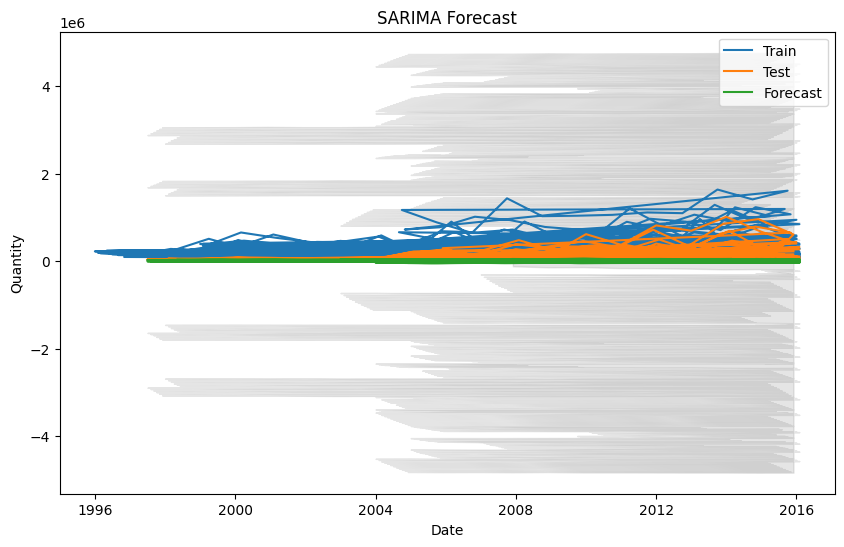

In [24]:
# Plot prevision
plt.figure(figsize=(10, 6))
plt.plot(train['date'], train['quantity'], label='Train')
plt.plot(test['date'], test['quantity'], label='Test')
plt.plot(test['date'], forecast.predicted_mean, label='Forecast')
plt.fill_between(test['date'], forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.2)
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()


#Build LSTM Model

In [26]:
# Prepare the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['quantity']])


In [28]:
# Sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 12
X, y = create_sequences(scaled_data, seq_length)

In [29]:
# Split data in train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [30]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [31]:
#model compilation
model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=5)

plt.show()


Epoch 1/5
8170/8170 [==============================] - 84s 9ms/step - loss: 0.0021
Epoch 2/5
8170/8170 [==============================] - 91s 11ms/step - loss: 0.0018
Epoch 3/5
8170/8170 [==============================] - 79s 10ms/step - loss: 0.0018
Epoch 4/5
8170/8170 [==============================] - 75s 9ms/step - loss: 0.0017
Epoch 5/5
8170/8170 [==============================] - 79s 10ms/step - loss: 0.0017


In [33]:
# Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


64/64 [==============================] - 2s 5ms/step


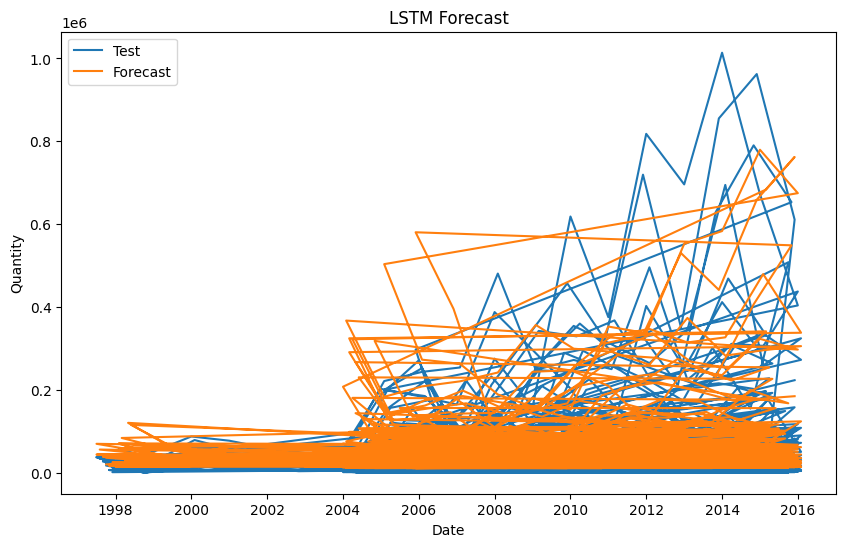

In [35]:
# Plot Prevision
plt.figure(figsize=(10, 6))
plt.plot(df['date'][-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Test')
plt.plot(df['date'][-len(predictions):], predictions, label='Forecast')
plt.title('LSTM Forecast')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

#Evaluate

In [38]:
# Evaluate SARIMA
sarima_pred = forecast.predicted_mean
mae_sarima = mean_absolute_error(test['quantity'], sarima_pred)
mse_sarima = mean_squared_error(test['quantity'], sarima_pred)
rmse_sarima = np.sqrt(mse_sarima)

In [39]:
# Evaluate LSTM
mae_lstm = mean_absolute_error(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions)
mse_lstm = mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions)
rmse_lstm = np.sqrt(mse_lstm)


In [40]:
print(f'SARIMA - MAE: {mae_sarima}, MSE: {mse_sarima}, RMSE: {rmse_sarima}')
print(f'LSTM - MAE: {mae_lstm}, MSE: {mse_lstm}, RMSE: {rmse_lstm}')

SARIMA - MAE: 55908.64657722915, MSE: 10762350304.686823, RMSE: 103741.74812816113
LSTM - MAE: 26842.70438071693, MSE: 2840505904.4968004, RMSE: 53296.396730893546


#Communicate Results